In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

### Model related modules

from   sklearn.model_selection import train_test_split
from   sklearn                 import model_selection, metrics
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.model_selection import RandomizedSearchCV
from   sklearn.metrics         import accuracy_score
from   sklearn.model_selection import cross_val_score
from   sklearn.metrics         import classification_report, confusion_matrix

%matplotlib inline

D:\Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
column_names    = ['preg', 'plas', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age', 'label']
df              = pd.read_csv('D:/RRD/data/pima-indians-diabetes.data.CSV',\
                              header= None, names = column_names)

print(df.columns)
print(df.shape)

Index(['preg', 'plas', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age',
       'label'],
      dtype='object')
(768, 9)


In [3]:
df.isnull().any()

preg       False
plas       False
pres       False
skin       False
insulin    False
mass       False
pedi       False
age        False
label      False
dtype: bool

In [4]:
df.astype(bool).sum(axis=0)

preg       657
plas       763
pres       733
skin       541
insulin    394
mass       757
pedi       768
age        768
label      268
dtype: int64

In [5]:
df['plas'].replace(0, np.nan, inplace=True)
df['pres'].replace(0, np.nan, inplace=True)
df['skin'].replace(0, np.nan, inplace=True)
df['mass'].replace(0, np.nan, inplace=True)

In [6]:
df.isnull().any()

preg       False
plas        True
pres        True
skin        True
insulin    False
mass        True
pedi       False
age        False
label      False
dtype: bool

In [7]:
df.dropna(axis = 0, inplace = True)
df.isnull().any()

preg       False
plas       False
pres       False
skin       False
insulin    False
mass       False
pedi       False
age        False
label      False
dtype: bool

In [8]:
### --------------------
### get the shape
### --------------------
print('\nGet the shape')
print(df.shape)
### --------------------
### Get the data structure
### --------------------
print('\nGet the data structure')
print(df.info())
### -----------------------
### Get the first five rows
### -----------------------
print('\nPrint first five rows')
print(df.head())


Get the shape
(532, 9)

Get the data structure
<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
preg       532 non-null int64
plas       532 non-null float64
pres       532 non-null float64
skin       532 non-null float64
insulin    532 non-null int64
mass       532 non-null float64
pedi       532 non-null float64
age        532 non-null int64
label      532 non-null int64
dtypes: float64(5), int64(4)
memory usage: 41.6 KB
None

Print first five rows
   preg   plas  pres  skin  insulin  mass   pedi  age  label
0     6  148.0  72.0  35.0        0  33.6  0.627   50      1
1     1   85.0  66.0  29.0        0  26.6  0.351   31      0
3     1   89.0  66.0  23.0       94  28.1  0.167   21      0
4     0  137.0  40.0  35.0      168  43.1  2.288   33      1
6     3   78.0  50.0  32.0       88  31.0  0.248   26      1


In [9]:
categorical_var =  ['preg','insulin','label']

for i in range(len(categorical_var)):
    df[categorical_var[i]] = df[categorical_var[i]].astype('category') 

print(df['label'].dtype)

category


In [10]:
df.describe()

,plas,pres,skin,mass,pedi,age
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,121.030075,71.505639,29.182331,32.890226,0.502966,31.614662
std,30.999226,12.310253,10.523878,6.881109,0.344546,10.761584
min,56.000000,24.000000,7.000000,18.200000,0.085000,21.000000
25%,98.750000,64.000000,22.000000,27.875000,0.258750,23.000000
50%,115.000000,72.000000,29.000000,32.800000,0.416000,28.000000
75%,141.250000,80.000000,36.000000,36.900000,0.658500,38.000000
max,199.000000,110.000000,99.000000,67.100000,2.420000,81.000000


In [11]:
df.describe(include = ['category'])

,preg,insulin,label
count,532,532,532
unique,17,185,2
top,1,0,0
freq,116,140,355


In [12]:
df['label'].value_counts().apply(lambda x: [x, ( x * 100) / df.shape[0]])

0    [355, 66.72932330827068]
1    [177, 33.27067669172932]
Name: label, dtype: object

In [13]:
feature_names   = df.columns
feature_names  =  feature_names.drop('label')
X              =  df.loc[:,feature_names] 
y              =  df.loc[:,'label']
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(532, 8)
(532,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [15]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#Predict the response for train dataset
predicted_train = rfc.predict(X_train)

In [17]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)


Training Data
[[243   2]
 [  5 122]]


In [18]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

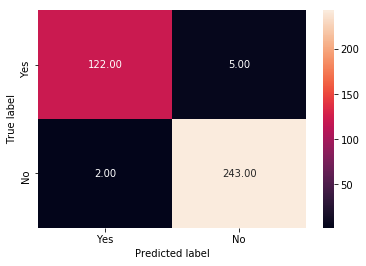

In [19]:
draw_cm(y_train, predicted_train )

In [20]:
accuracy_train     = rfc.score(X_train, y_train) 
measures_train     = classification_report(y_train, predicted_train) 

print("\nTraining data\n")
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))
print(measures_train) 


Training data

Training Accuracy: 98.118%
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       245
          1       0.98      0.96      0.97       127

avg / total       0.98      0.98      0.98       372



In [21]:
'''
This function draws a ROC curve and shows the AUROC
'''
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

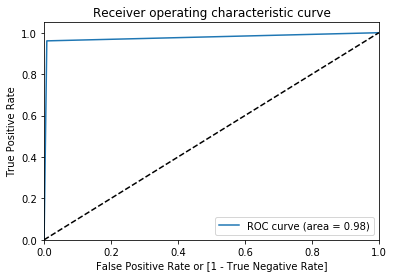

(array([0.        , 0.00816327, 1.        ]),
 array([0.        , 0.96062992, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [22]:
n_splits           =  10
random_state       =  1234
scoring            = 'roc_auc'
auc_train          = cross_val_score(rfc, X_train, y_train, cv=10, scoring = scoring)
draw_roc( y_train, predicted_train)    

In [23]:
predicted_test = rfc.predict(X_test)

In [24]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predicted_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predicted_test))

=== Confusion Matrix ===
[[98 12]
 [29 21]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.77      0.89      0.83       110
          1       0.64      0.42      0.51        50

avg / total       0.73      0.74      0.73       160



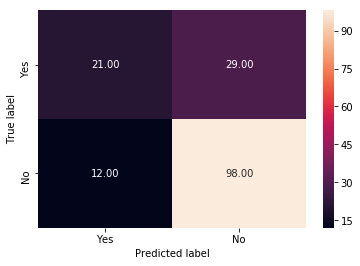

In [25]:
draw_cm(y_test, predicted_test)

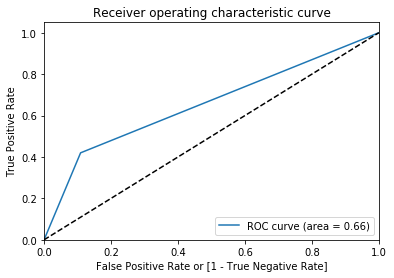

(array([0.        , 0.10909091, 1.        ]),
 array([0.  , 0.42, 1.  ]),
 array([2, 1, 0], dtype=int64))

In [26]:
draw_roc( y_test, predicted_test) 

### Find optimum cut-off
We know the data set is not balanced and hence the standard cut-off of 50% for creating the confusion matrix will not hold good. We need to find the optimum cut-off to divide the data set into two classes.

In [27]:
"""
  This function calculates the Youdens J score which gives the optimum cut-off point 
  given the fpr, tpr and thresholds
"""
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = np.abs(tpr - fpr)
    j_ordered = sorted(zip(j_scores,thresholds, fpr, tpr))
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    res = {'fpr': j_ordered[-1][2], 'tpr': j_ordered[-1][3], 'threshold' : j_ordered[-1][1]}
    return res

In [28]:
predicted_proba_tr = rfc.predict_proba(X_train)[:,1]

{'fpr': 0.02040816326530612, 'threshold': 0.5, 'tpr': 0.9921259842519685}

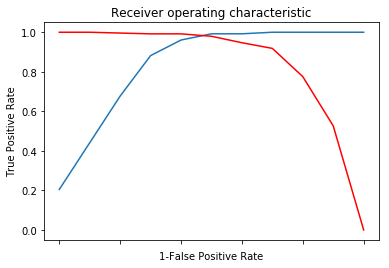

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predicted_proba_tr, \
                                         drop_intermediate = True )
get_youdens_j_cutoff(fpr, tpr, thresholds)  

### New cutoff 0.50 So no reworking is required

In [30]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
print('n_estimators ', n_estimators)
print('max_depth ', max_depth)

n_estimators  [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_depth  [100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, None]


In [31]:
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'criterion': ["gini", "entropy"]
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, \
                                cv = 10, verbose = 2, random_state = 42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.9min finished


{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 300, 'criterion': 'entropy'}


In [32]:
rfc = RandomForestClassifier(n_estimators = rfc_random.best_params_['n_estimators'], \
                             max_depth    = rfc_random.best_params_['max_depth'],\
                             max_features = rfc_random.best_params_['max_features'],\
                             criterion    = rfc_random.best_params_['criterion'])
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=300, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_predict_train   = rfc.predict(X_train)
rfc_cv_score_train  = cross_val_score(rfc, X_train, y_train, cv = 10, scoring = 'roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, rfc_predict_train))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, rfc_predict_train))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score_train)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score_train.mean())

=== Confusion Matrix ===
[[245   0]
 [  0 127]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       245
          1       1.00      1.00      1.00       127

avg / total       1.00      1.00      1.00       372



=== All AUC Scores ===
[0.82461538 0.84923077 0.93230769 0.93692308 0.7        0.87019231
 0.82852564 0.94618056 0.79166667 0.90798611]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8587628205128206


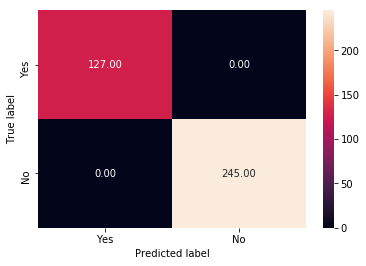

In [34]:
draw_cm(y_train, rfc_predict_train)

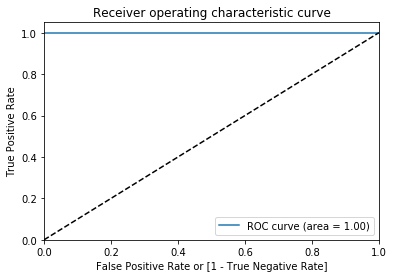

(array([0., 1.]), array([1., 1.]), array([1, 0], dtype=int64))

In [35]:
draw_roc( y_train, rfc_predict_train) 

In [36]:
rfc_predict_test   = rfc.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict_test ))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict_test ))

=== Confusion Matrix ===
[[96 14]
 [19 31]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       110
          1       0.69      0.62      0.65        50

avg / total       0.79      0.79      0.79       160



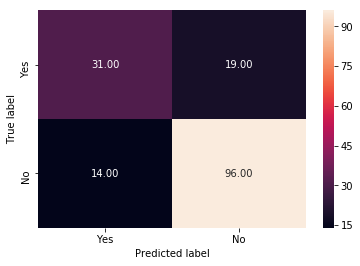

In [37]:
draw_cm(y_test, rfc_predict_test)

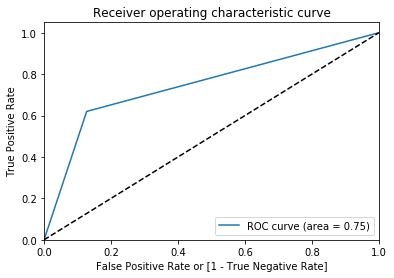

(array([0.        , 0.12727273, 1.        ]),
 array([0.  , 0.62, 1.  ]),
 array([2, 1, 0], dtype=int64))

In [38]:
draw_roc( y_test, rfc_predict_test) 

In [39]:
feature_imp = pd.Series(rfc.feature_importances_, index = feature_names).sort_values(ascending = False)
print(feature_imp)

plas       0.239779
age        0.147950
mass       0.129815
pedi       0.113124
insulin    0.105441
skin       0.103718
pres       0.082959
preg       0.077214
dtype: float64


D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


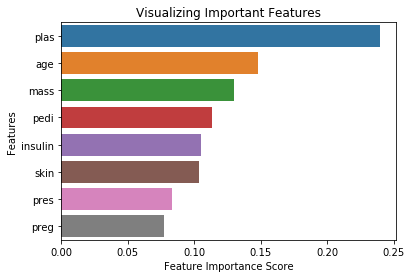

In [40]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()